<a href="https://colab.research.google.com/github/Andarsan/age_determination/blob/main/gidhub_%D0%B2%D0%BE%D0%B7%D1%80%D0%B0%D1%81%D1%82_%D0%BF%D0%BE%D0%BA%D1%83%D0%BF%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение возраста покупателей

## Исследовательский анализ данных

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np
from tensorflow import keras # для сохранения и загрузки модели

In [ ]:
def df_plt_describe(_df,_for,describe=False):

    plt.style.use('classic')
    plt.figure(figsize=(12,6))
    for i in _for:
        j=0
        for _ in range(1):
            if _df[i[0]].dtype != 'object':
                # Set up the plot
                ax = plt.subplot(2, 2, j + 1)
                j = j+1
                # Draw the plot

                ax.boxplot(_df[i[0]])
                plt.ylabel(i[2])
                plt.xlabel(f'медиана = {_df[i[0]].median():.2f}, среднее = {_df[i[0]].mean():.2f}')

                # Title and labels
                ax.set_title('Диаграмма размаха '+i[1])
                ax = plt.subplot(2, 2, j + 1)
                j = j+1
                # Draw the plot
                ax.hist(_df[i[0]], bins = 100)
                plt.label=i[2]
                plt.ylabel(i[3])
                plt.xlabel(i[2])
                #[['real_age','числа заказов','возраст','количество','возраст']]
                # Title and labels
                ax.set_title('Гистограмма ' + i[1])
        plt.tight_layout()
        plt.show()
        plt.close()
    if describe:
        display(_df[_for[0][0]].describe())

In [ ]:
#labels = pd.read_csv('/datasets/faces/labels.csv')
labels = pd.read_csv('C:/Users/andar/Downloads/data_jpg/data_jpg.csv')

In [ ]:
display(labels.info())
display(labels.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7591 non-null   int64 
 1   file_name   7591 non-null   object
 2   real_age    7591 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.0+ KB


None

,Unnamed: 0,file_name,real_age
0,0,000000.jpg,4
1,1,000001.jpg,18
2,2,000002.jpg,80
3,3,000003.jpg,50
4,4,000004.jpg,17


In [ ]:
i=[['real_age','числа заказов','возраст','количество','возраст']]
for _i in i:
    display(_i[2])


'возраст'

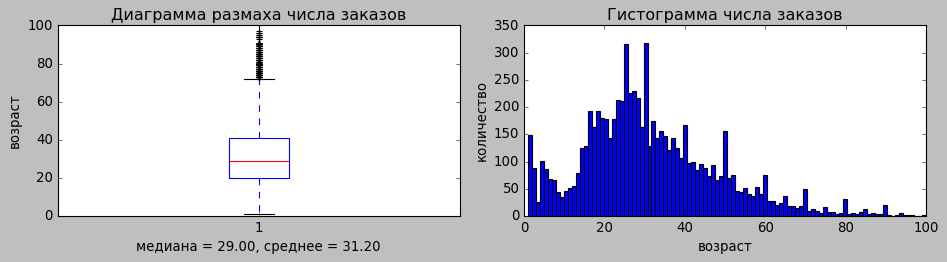

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

In [ ]:
df_plt_describe(labels,[['real_age','числа заказов','возраст','количество','возраст']],True)

In [ ]:
# процнт количество клиентов в возрасте от 14 до 50
labels.query('real_age >= 14 and real_age <= 50').shape[0]*100 // labels.shape[0]

75

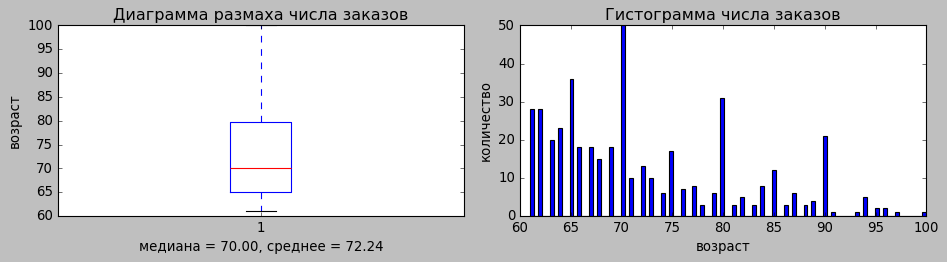

In [ ]:
df_plt_describe(labels.query('real_age > 60'),[['real_age','числа заказов','возраст','количество','возраст']])

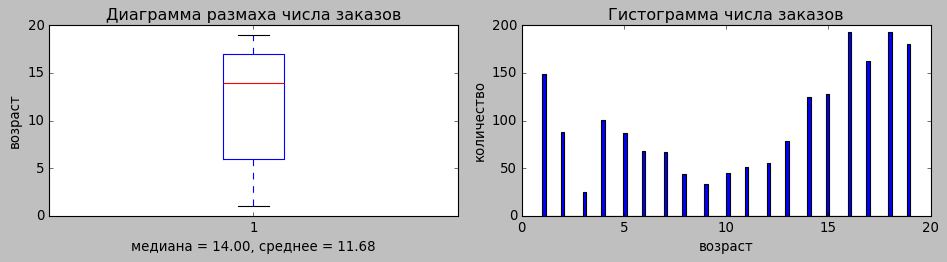

In [ ]:
df_plt_describe(labels.query('real_age < 20'),[['real_age','числа заказов','возраст','количество','возраст']])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
#train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='C:/Users/andar/Downloads/data_jpg/jpg',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [ ]:
features, target = next(train_gen_flow)
display(f'Размерность тензора одного батча с данными     : {features.shape}')
display(f'Всего таких батчей с данными                   : {len(train_gen_flow)}')
display(f'Всего фотографий для построения модели         : {labels.shape[0]}')

'Размерность тензора одного батча с данными     : (16, 224, 224, 3)'

'Всего таких батчей с данными                   : 475'

'Всего фотографий для построения модели         : 7591'

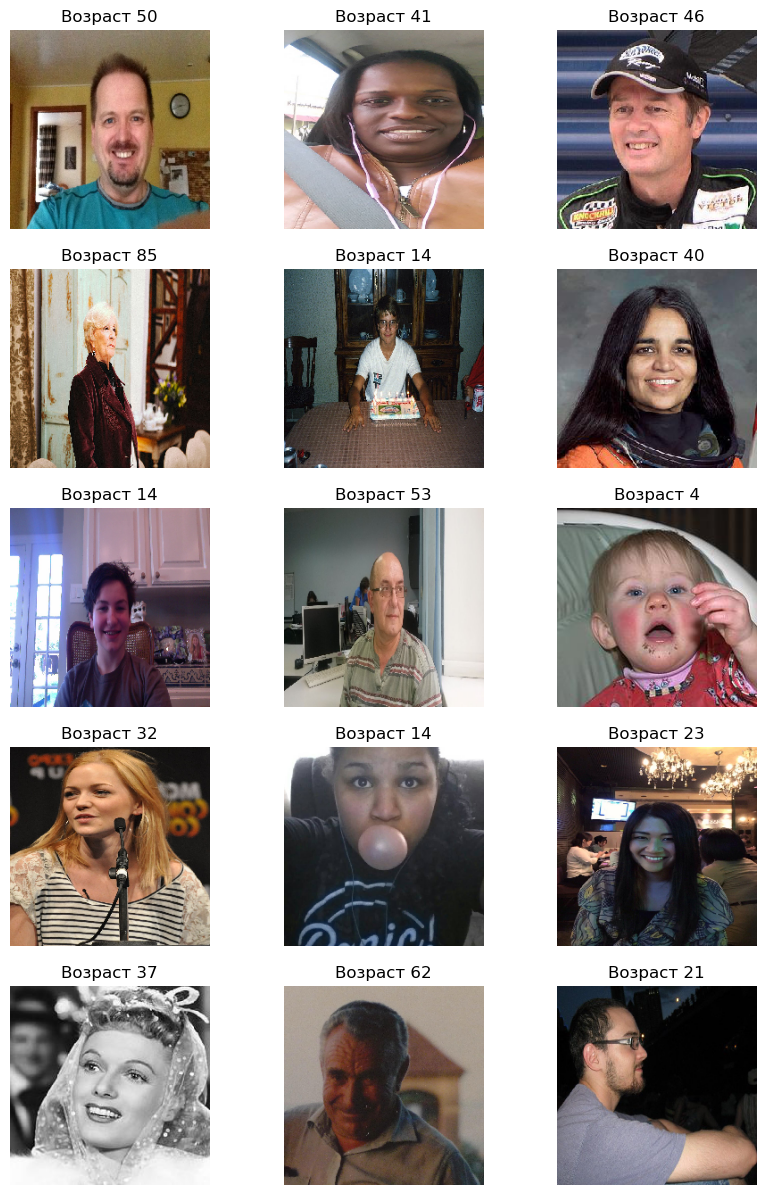

In [ ]:
fig = plt.figure(figsize=(10,15))
plt.style.use('default')
for i in range(15):
    fig.add_subplot(5,3, i+1)
    plt.title(f'Возраст {target[i]}')
    plt.axis('off')
    plt.imshow(features[i])
plt.show()

**Вывод:**

* распределение по возрасту нормальное
* старичков после 70 мало возможно модель не сможет на них обучиться
* можно увеличить количество картинок путём горизонтального поворота

**Вывод :**

* Представленные данные содержат 7591 фотографий людей разного возраста и пола на различном фоне, освещённость и масштаб неоднородны имеются как цветные, так и чёрно белые фотографии, расположение всех фотографий вертикальное.
* Из чего можно сделать вывод что, дополнительная обработка фотографий не требуется.
* По каждому снимку есть информация о возрасте посетителя, что необходима для обучения модели.

* Распределение фотографий по возрасту не равномерны, основная часть фотографий — это люди в возрасте от 14 до 50 их 75 %, средний возраст составляет 31, медиана 29, минимальный возраст 1 максимальный 100. Мало фотографий детей от 4 до 13 лет, особенно 4х и 9ти - летнего возраста и пожилых от 60 лет, 92, 93, 98, и 99 ти летних вообще нет!. Возможно, по ним модель и будет больше ошибаться.

* Используем только аугментацию (поворот по горизонтали) в процессе подготовки тренировочных данных. Их количество с использованием аугментации должно быть достаточно для решения поставленной задачи.


## Обучение модели

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

def load_train(path):
    labels = pd.read_csv(path + 'data_jpg.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255, horizontal_flip=True)
    train_gen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
        directory=path + 'jpg/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'data_jpg.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(dataframe=labels,
        directory=path + 'jpg/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    return test_gen_flow

def create_model(input_shape):
    optimizer = Adam(learning_rate=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet',
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=13,
               steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

In [ ]:
path = 'C:/Users/andar/Downloads/data_jpg/'
model = train_model(create_model((224, 224, 3)), load_train(path), load_test(path))

Found 5694 validated image filenames.
Found 1897 validated image filenames.
Epoch 1/13
178/178 - 527s - loss: 270.2537 - mae: 11.9879 - val_loss: 882.6072 - val_mae: 24.8568 - 527s/epoch - 3s/step
Epoch 2/13
178/178 - 536s - loss: 93.6760 - mae: 7.4328 - val_loss: 922.4406 - val_mae: 25.5706 - 536s/epoch - 3s/step
Epoch 3/13
178/178 - 502s - loss: 58.9269 - mae: 5.8758 - val_loss: 324.9153 - val_mae: 13.5391 - 502s/epoch - 3s/step
Epoch 4/13
178/178 - 515s - loss: 44.7816 - mae: 5.1284 - val_loss: 152.5136 - val_mae: 9.4447 - 515s/epoch - 3s/step
Epoch 5/13
178/178 - 510s - loss: 35.0038 - mae: 4.5345 - val_loss: 115.8212 - val_mae: 8.3595 - 510s/epoch - 3s/step
Epoch 6/13
178/178 - 495s - loss: 29.2740 - mae: 4.1459 - val_loss: 112.7782 - val_mae: 8.3544 - 495s/epoch - 3s/step
Epoch 7/13
178/178 - 503s - loss: 26.0157 - mae: 3.9127 - val_loss: 87.3896 - val_mae: 7.0858 - 503s/epoch - 3s/step
Epoch 8/13
178/178 - 505s - loss: 21.7178 - mae: 3.5832 - val_loss: 95.2992 - val_mae: 7.6420 

In [ ]:
model.save('C:/Users/andar/Downloads/data_jpg/save_model/')
model_load = keras.models.load_model('C:/Users/andar/Downloads/data_jpg/save_model/')

INFO:tensorflow:Assets written to: C:/Users/andar/Downloads/data_jpg/save_model/assets


INFO:tensorflow:Assets written to: C:/Users/andar/Downloads/data_jpg/save_model/assets


* сохранения и загрузка модели

## Определим свой возраст

In [ ]:
labels = pd.read_csv('C:/Users/andar/Downloads/data_jpg/vadim/data_jpg_vadim.csv')
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='C:/Users/andar/Downloads/data_jpg/vadim/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        seed=12345)

Found 16 validated image filenames.


In [ ]:
features, target = next(train_gen_flow)
display(f'Размерность тензора одного батча с данными     : {features.shape}')
display(f'Всего таких батчей с данными                   : {len(train_gen_flow)}')
display(f'Всего фотографий для построения модели         : {labels.shape[0]}')

'Размерность тензора одного батча с данными     : (16, 224, 224, 3)'

'Всего таких батчей с данными                   : 1'

'Всего фотографий для построения модели         : 16'

1/1 [==============================] - 0s 363ms/step


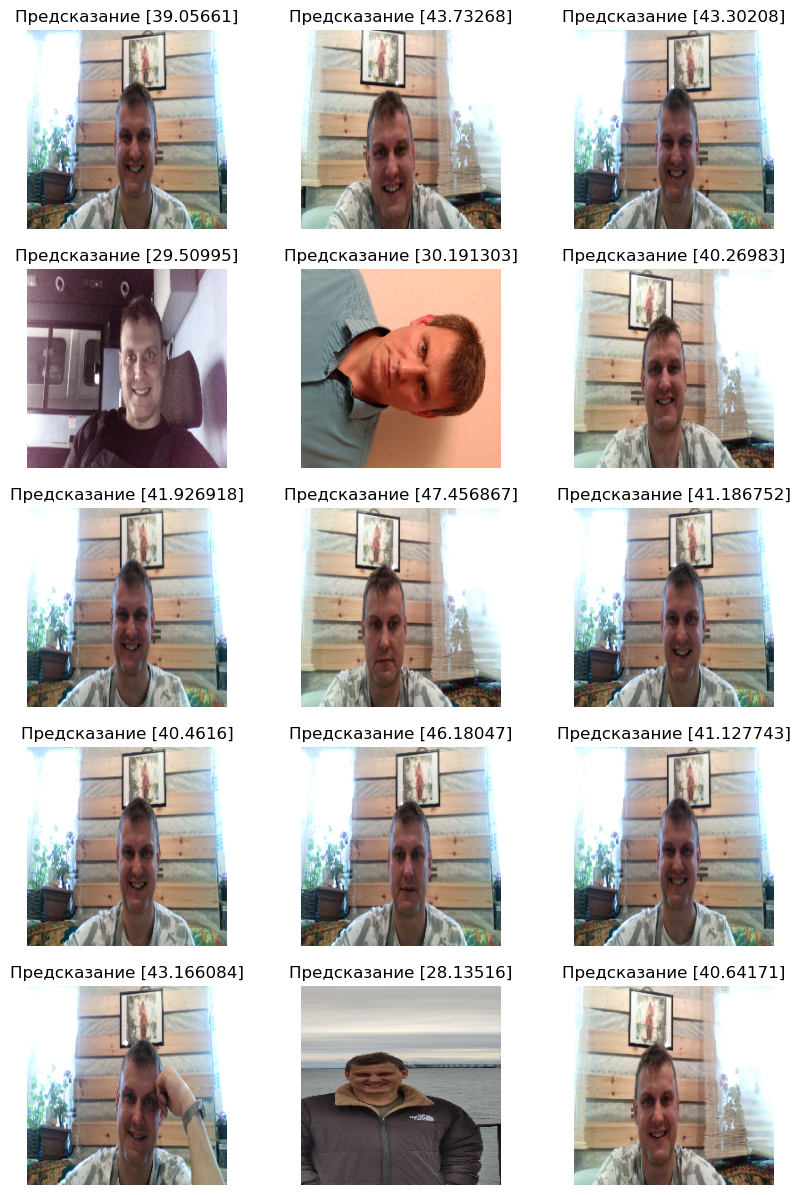

'Мой возраст: '

40.06192

In [ ]:
target = model_load.predict(train_gen_flow[0][0])
fig = plt.figure(figsize=(10,15))
plt.style.use('default')
for i in range(15):
    fig.add_subplot(5,3, i+1)
    plt.title(f'Предсказание {target[i]}')
    plt.axis('off')
    plt.imshow(features[i])
plt.show()
display('Мой возраст: ', target.mean())

Для построения нейронной сети была использована архитектура RestNet50, веса были инициализированы  ‘Imagenet’,  был использован алгоритм Adam  и градиентный спуск взял минимальный рекомендуемый  0.0001.
К исходному набору применил аугментацию данных, количество их было увеличено за счёт горизонтального отражения.

В итоге модель выдала MAE: 5.9412


In [ ]:
'end'